# ADS ASSIGNMENT 3- AMOGH A M 

## Load the Dataset

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


##  Perform Below Visualizations.

### Univariate Analysis

#### HISTOGRAM

In [7]:
import matplotlib.pyplot as plt

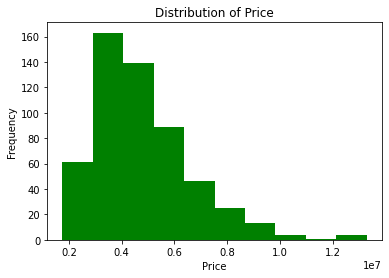

In [7]:
plt.hist(df['price'],color="green")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


#### PIE CHART

In [8]:
categories = list(df['stories'].unique())
value_counts = df['stories'].value_counts()

([<matplotlib.patches.Wedge at 0x1eb79a7c460>,
 [Text(0.2173194882526601, 1.078319173540748, '3'),
  Text(-0.6744482341032301, -0.8689761674033614, '4'),
  Text(0.8511907813779661, -0.6967598249735469, '2'),
  Text(1.0723198311988387, -0.24521455833146277, '1')])

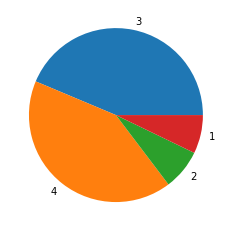

In [10]:
plt.pie(value_counts,labels=categories)

### Bivariate Analysis


#### BOX PLOT

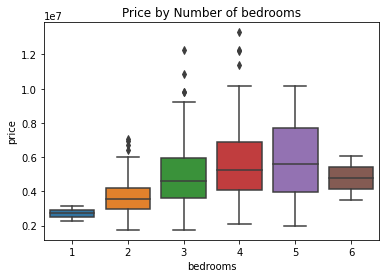

In [11]:
import seaborn as sns
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price by Number of bedrooms')
plt.show()


#### STACKED BAR CAHRT

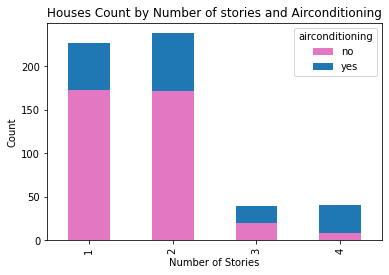

In [8]:
stories_counts = df.groupby('stories')['airconditioning'].value_counts().unstack()
colors = ['tab:pink', 'tab:blue']
stories_counts.plot(kind='bar', stacked=True,color=colors)
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.title('Houses Count by Number of stories and Airconditioning')
plt.show()

### Multivariate Analysis

#### SCATTER PLOT

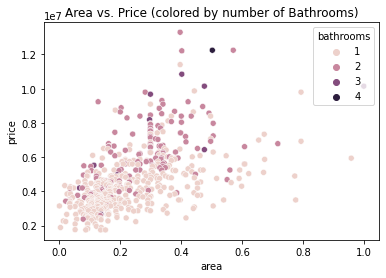

In [71]:
sns.scatterplot(x='area', y='price', hue='bathrooms', data=df)
plt.title('Area vs. Price (colored by number of Bathrooms)')
plt.show()

#### CAT PLOT

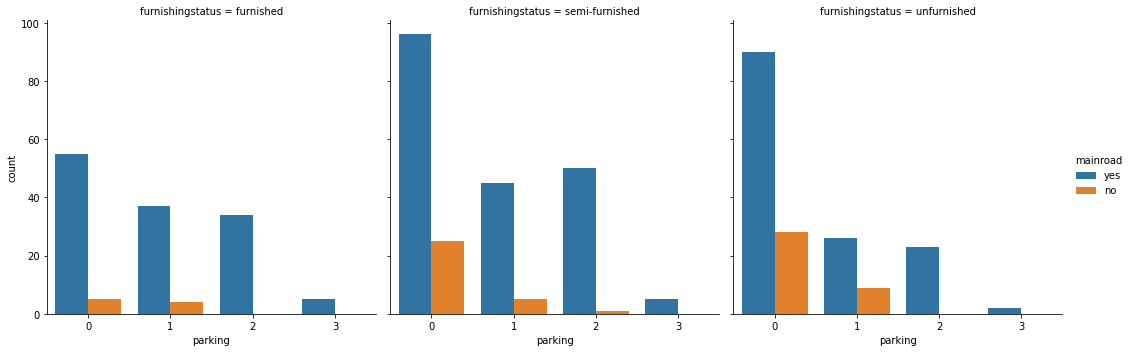

In [16]:
sns.catplot(x='parking', hue='mainroad', col='furnishingstatus', data=df, kind='count')
plt.show()

### Perform Descriptive Statistics on dataset

In [22]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Check for Missing values and deal with them.

In [24]:
missing_values = df.isnull().sum()
print(missing_values)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [25]:
# No Missing values are found

###  Find the outliers and replace the outliers

In [33]:
df['Area_dummy']=df['area']

In [34]:
import numpy as np
z_threshold = 3
z_scores = (df['Area_dummy'] - df['Area_dummy'].mean()) / df['Area_dummy'].std()
outliers = (np.abs(z_scores) > z_threshold)
df.loc[outliers,'Area_dummy'] = df['Area_dummy'].mean()

In [35]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,7420.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,8960.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,9960.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,7500.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,3000.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished,2400.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished,3620.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished,2910.0


### Check for Categorical columns and perform encoding.

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])
df['mainroad']= label_encoder.fit_transform(df['mainroad'])
df['guestroom']= label_encoder.fit_transform(df['guestroom'])
df['basement']= label_encoder.fit_transform(df['basement'])
df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']= label_encoder.fit_transform(df['airconditioning'])

In [39]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,1,0,0,0,1,2,0,7420.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,8960.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,9960.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,0,7500.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,2,3000.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,1,2400.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,2,3620.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2910.0


### Split the data into dependent and independent variables.

In [48]:
columns_to_drop = ['price', 'Area_dummy']
x = df.drop(columns_to_drop, axis=1)
y=df['price']

In [49]:
#Independent variables
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,0.396564,4,2,3,1,0,0,0,1,2,0
1,0.502405,4,4,4,1,0,0,0,1,3,0
2,0.571134,3,2,2,1,0,1,0,0,2,1
3,0.402062,4,2,2,1,0,1,0,1,3,0
4,0.396564,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,2,1,1,1,0,1,0,0,2,2
541,0.051546,3,1,1,0,0,0,0,0,0,1
542,0.135395,2,1,1,1,0,0,0,0,0,2
543,0.086598,3,1,1,0,0,0,0,0,0,0


In [50]:
#Dependent Variables
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Scale the independent variables

In [43]:
min_value = df['area'].min()
max_value = df['area'].max()
df['area']  = (df['area'] - min_value) / (max_value - min_value)

# Assign the scaled column back to the dataset


In [44]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,0.396564,4,2,3,1,0,0,0,1,2,0,7420.0
1,12250000,0.502405,4,4,4,1,0,0,0,1,3,0,8960.0
2,12250000,0.571134,3,2,2,1,0,1,0,0,2,1,9960.0
3,12215000,0.402062,4,2,2,1,0,1,0,1,3,0,7500.0
4,11410000,0.396564,4,1,2,1,1,1,0,1,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,2,1,1,1,0,1,0,0,2,2,3000.0
541,1767150,0.051546,3,1,1,0,0,0,0,0,0,1,2400.0
542,1750000,0.135395,2,1,1,1,0,0,0,0,0,2,3620.0
543,1750000,0.086598,3,1,1,0,0,0,0,0,0,0,2910.0


### Split the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split

In [51]:
#80-20 split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [52]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
46,0.298969,3,2,4,1,0,0,0,1,1,0
93,0.381443,3,2,1,1,0,1,0,1,3,1
335,0.148866,2,1,1,1,0,1,0,1,2,0
412,0.065979,3,1,2,1,0,1,0,0,0,2
471,0.144330,3,1,2,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
71,0.298969,4,2,4,1,0,0,0,1,0,2
106,0.261168,4,2,1,1,0,1,0,1,0,1
270,0.195876,3,2,3,1,0,0,1,0,1,0
435,0.164261,2,1,1,1,0,0,0,0,0,2


In [53]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

###  Build the Model Train the Model Test the Model

#### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred=model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score


In [62]:
mse=mean_squared_error(y_test,y_pred)
mse

1852745807729.1436

In [63]:
r2=r2_score(y_test,y_pred)
r2

0.6334513682813137

#### Ridge Regression

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [65]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [66]:
print("Ridge Regression:")
print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)
print()

Ridge Regression:
Mean Squared Error: 1862536645778.3213
R-squared: 0.6315143414774564



#### Lasso Regression

In [67]:
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [68]:
print("Lasso Regression:")
print("Mean Squared Error:", lasso_mse)
print("R-squared:", lasso_r2)

Lasso Regression:
Mean Squared Error: 1852748476309.794
R-squared: 0.6334508403272997
